## LVC 2: Practical Application on Fashion MNIST

In this application, we will continue to work on the Fashion MNIST dataset and will try to figure out how are CNNs used with the image data.

Note that we will create a very simple model here and will only talk about the architecture with limited features. Please feel free to add/modify the architecture as per your understanding.


### Libraries, data preprocessing and visualisations

In [ ]:
#importing the required libraries

import numpy as np
import pandas as pd
import tensorflow as tf

#Load the data

(X_train, trainY), (X_test,testY) = tf.keras.datasets.fashion_mnist.load_data()
X_train.shape, trainY.shape, X_test.shape, testY.shape

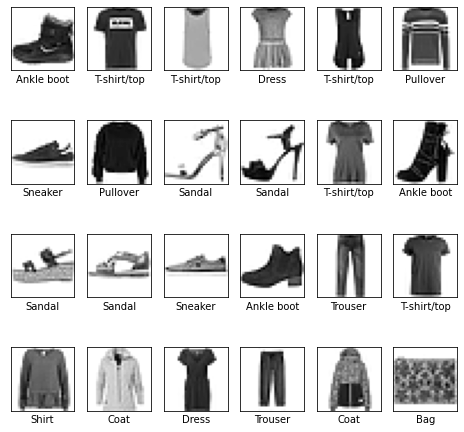

In [ ]:
# lets visualise the dataset at hand
import matplotlib.pyplot as plt
class_names_list = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(8,8))
for i in range(24):
    plt.subplot(4,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names_list[trainY[i]])
plt.show()

In [ ]:
#lets normalise the dataset. Since there are pixel values ranging from 0-255, lets divide by 255 to get the new ranges from 0-1

X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

# Also we will create one hot encoded vectors for the target variables
y_train = tf.keras.utils.to_categorical(trainY)
y_test = tf.keras.utils.to_categorical(testY)

### Model Building

In [ ]:
# Imporing the libraries as required. Note that we are using tf.keras here.
import tensorflow as tf
# Keras Sequential Model
from tensorflow.keras.models import Sequential

# Importing all the different layers and optimizers
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Initiating the sequential model object
model = Sequential()

# Generating the model and adding layers
# Two convolution layers and pooling layer
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same', data_format='channels_last', input_shape=(28,28,1)))
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same', data_format='channels_last'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the model and making room for the fully connected component
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

In [ ]:
# Let us summarise the model structure
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 16)        64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                200768    
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                2

### Compiling, fitting and evaluting the test set prediction

In [ ]:
# Reshaping the training and the testing data. 
# This needs to be reshaped because of the input shape requirement of the CNN

x_train = X_train.reshape(60000,28,28,1)
x_test = X_test.reshape(10000,28,28,1)

In [ ]:
# Optimizer for the model, Adam with a learning rate(lr) of 0.01.
optimizer = Adam(lr=0.01)

# Compile the model with the optimizer, loss(catergorical cross entropy) and the metrics(accuracy) to look at.
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
# Fitting the model with a batch size of 128 and 10 epochs.

model.fit(x_train, y_train, validation_data=(x_test, y_test), verbose = 1, batch_size=128, epochs = 10)

Epoch 1/10
469/469 [==============================] - 65s 139ms/step - loss: 0.3765 - accuracy: 0.8656 - val_loss: 6.5967 - val_accuracy: 0.1195
Epoch 2/10
469/469 [==============================] - 65s 139ms/step - loss: 0.3144 - accuracy: 0.8855 - val_loss: 0.6902 - val_accuracy: 0.7773
Epoch 3/10
469/469 [==============================] - 65s 138ms/step - loss: 0.2797 - accuracy: 0.8978 - val_loss: 0.3694 - val_accuracy: 0.8731
Epoch 4/10
469/469 [==============================] - 65s 138ms/step - loss: 0.2669 - accuracy: 0.9022 - val_loss: 0.6112 - val_accuracy: 0.8116
Epoch 5/10
469/469 [==============================] - 65s 138ms/step - loss: 0.2459 - accuracy: 0.9096 - val_loss: 0.4648 - val_accuracy: 0.8360
Epoch 6/10
469/469 [==============================] - 65s 139ms/step - loss: 0.2297 - accuracy: 0.9139 - val_loss: 0.5345 - val_accuracy: 0.8504
Epoch 7/10
469/469 [==============================] - 65s 139ms/step - loss: 0.2201 - accuracy: 0.9179 - val_loss: 0.5253 - val_ac

In [ ]:
test_pred = np.argmax(model.predict(x_test), axis=-1)

from sklearn.metrics import classification_report
print(classification_report(testY, test_pred ))

              precision    recall  f1-score   support

           0       0.68      0.91      0.78      1000
           1       0.93      0.95      0.94      1000
           2       0.93      0.64      0.76      1000
           3       0.84      0.89      0.86      1000
           4       0.82      0.79      0.80      1000
           5       0.70      1.00      0.83      1000
           6       0.73      0.58      0.64      1000
           7       0.97      0.80      0.87      1000
           8       0.93      0.92      0.93      1000
           9       0.96      0.89      0.92      1000

    accuracy                           0.83     10000
   macro avg       0.85      0.83      0.83     10000
weighted avg       0.85      0.83      0.83     10000



#### Observations on the test set
- Class 6 (Shirt) has a poor recall rate. only about 60% of the relevant shirt images were actually classified as tshirt.
- Class 5 (Sandal) on the other hand, has a perfect recall score.
- The overall accuracy is 83% (Not bad)
There is an amount of overfit in the modelling process. We can use regularisation, droput, batch norm and data augmentation to handle it. Feel free to apply these techniques on this dataset.

### Comments
- We see that the model has overfit the training data. 
 - To avoid the overfitting, we can try out dropout layers.
- Note the shape of the training and the testing data for the fitting process. Data should be properly shaped when sending in volumes in the first layer.
- To get better accuracies, one can try to add more convolutional filters, more convolutional and dense layers. However, adding more node also increases the time required to fit the model and hence there is a tradeoff.
 - In such case, batch normalisation comes in handy. It can speed up the training process.

 **Recommendations**
 - Play aorund with hyperparameters and see if you can improve the accuracy.
 - Try out different optimizers and assess their effect.
 - Also, try out the initialisers to check their effect on model building process.